<a href="https://colab.research.google.com/github/volgasezen/is584/blob/main/Lab 1/Basic NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="margin-bottom:0">IS 584: Deep Learning for Text Analytics</h1>

<h3 style="margin-top:0">Lab 1: Basic Natural Language Processing (NLP)</h2>
<h4 style="margin-top:0">Given by Volga Sezen</h4>
<i>Originally created by Özgün Ozan Kılıç. Thanks to Arif Ozan Kızıldağ for feedback.</i>
<br>
<br>

In this lab, we will process some tweets that include the hashtag "#covid19" to obtain their normalized versions which can be used in various analyses. The dataset we will use is obtained through filtering out non-complete tweets of [a public Kaggle dataset](https://www.kaggle.com/gpreda/covid19-tweets). You can later apply the same processes to your own datasets.

-----

## Setting up<a id="colab"></a>

If your local (or cloud) environment doesn't have the packages listed below, you can run the cell block below to install them. If you don't have a local python environment, you can use Google Colab instead. Through Colab you can access a free virtual machine with a dedicated python environment. You execute python commands via ipython notebooks primarily.

In [ ]:
!pip install contractions -q
!pip install emoji -q
!pip install autocorrect -q
!pip install tiktoken -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Executing the following command will download the filtered version of covid tweets from our repository.

In [ ]:
!wget 'https://raw.githubusercontent.com/volgasezen/is584/main/Lab 1/covid19_tweets_filtered.csv'

--2026-02-16 15:08:15--  https://raw.githubusercontent.com/volgasezen/is584/main/Lab%201/covid19_tweets_filtered.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14531717 (14M) [text/plain]
Saving to: ‘covid19_tweets_filtered.csv.6’

covid19_tweets_filt 100%[===================>]  13.86M  --.-KB/s    in 0.1s    

2026-02-16 15:08:15 (125 MB/s) - ‘covid19_tweets_filtered.csv.6’ saved [14531717/14531717]



## Importing and cleaning data<a id="data"></a>

In [ ]:
import pandas as pd
import html
import contractions

# Importing it using Pandas (change the path as necessary):
dataset = pd.read_csv("covid19_tweets_filtered.csv")

# The function we had also used while collecting some tweets, contraction
# expansion feature added:
def simplify_text(text):
    # Replaces line breaks or other whitespace characters with a single space:
    text = " ".join(text.split())

    # Unescapes HTML so that characters like "&" are displayed correctly:
    text = html.unescape(text)

    # Expands English contractions. Example: "let's" -> "let us"
    # Note that it may not yield the correct result with an ambigurous
    # contraction such as "he's" (it could be "he is" or "he has").
    # By the way, it does not preserve letter cases, but we were going to
    # lowercase them anyway.
    text = contractions.fix(text)

    return text

# It looks like tweets do not require HTML-unescaping anyway, but applying
# simplify_text() to all texts should at least get rid of unnecessary whitespace:
dataset["text"] = dataset["text"].map(simplify_text)

# This option will automatically set the column width when we display data:
pd.set_option('display.max_colwidth', 0)

# Taking a look at the tweet contents:
dataset["text"].head()

,text
0,Praying for good health and recovery of @ChouhanShivraj . #covid19 #covidPositive
1,July 25 #COVID19 update #TamilNadu - 6988 Discharge- 7758 People tested - 61729 Actice cases - 52273 #chennai - 1329
2,Second wave of #COVID19 in Flanders..back to more #homework again... https://t.co/9swImZACMN
3,Holy water in times of #COVID19 https://t.co/YaZ49yxL27
4,#FEMA acknowledges #PuertoRico lacks rebuilt homes and a hospital to survive #COVID19 https://t.co/PLXqKc5K5d


We can easily read these tweets, but they are far from being suitable for analysis.

We can filter tweets by language using the API, and our dataset is _seemingly_ made of tweets written in English, but it can be a good idea to check their language on our end before analysis. For this, we can use langdetect package and see if there is a text that is not detected to be in English. Overall, a small percentage of non-english tweets are actually not in English, with the rest being incorrectly tagged as another language.

## NLTK<a id="nltk"></a>

For NLP with English texts, we will mostly use Natural Language Toolkit (NLTK) package. It is one of the most popular NLP packages for Python, and it has many useful tools. If you have Anaconda, it should come with it. If you do not have it, check [this](https://riptutorial.com/nltk#installation-or-setup) page for installation. We also need to manually download some datasets that it will use. If you have not already downloaded them, run the cell below:

In [ ]:
from nltk import download
download('popular') # Popular datasets
download('tagsets') # Tagsets for POS tagging
download('vader_lexicon') # Lexicon for sentiment analysis
download('averaged_perceptron_tagger_eng') # POS tagger DL model

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

## Tokenization<a id="token"></a>

To be able to analyze the data, we need to split each text into small units. This process is called "tokenization." It is mostly done by splitting the text using whitespace and punctuation, but there are different tokenizers that handle certain details slightly differently. NLTK has a tweet-specific tokenizer that preserves "#" and "@" characters while other tokenizers can mess up Twitter-specific notations. See how tweets are tokenized below:

In [ ]:
from nltk.tokenize import TweetTokenizer

# This tokenizer will tokenize tweets. "preserve_case" parameter can be used to
# preserve cases or make it all lowercase. "reduce_len" parameter shortens
# consecutive character repetitions to at most three consecutive repetitions to
# reduce noise.
tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True)

for tweet in dataset["text"].head():
    print(tweet,"\n└─>",tokenizer.tokenize(tweet),"\n")

Praying for good health and recovery of @ChouhanShivraj . #covid19 #covidPositive 
└─> ['praying', 'for', 'good', 'health', 'and', 'recovery', 'of', '@chouhanshivraj', '.', '#covid19', '#covidpositive'] 

July 25 #COVID19 update #TamilNadu - 6988 Discharge- 7758 People tested - 61729 Actice cases - 52273 #chennai - 1329 
└─> ['july', '25', '#covid19', 'update', '#tamilnadu', '-', '6988', 'discharge', '-', '7758', 'people', 'tested', '-', '61729', 'actice', 'cases', '-', '52273', '#chennai', '-', '1329'] 

Second wave of #COVID19 in Flanders..back to more #homework again... https://t.co/9swImZACMN 
└─> ['second', 'wave', 'of', '#covid19', 'in', 'flanders', '..', 'back', 'to', 'more', '#homework', 'again', '...', 'https://t.co/9swImZACMN'] 

Holy water in times of #COVID19 https://t.co/YaZ49yxL27 
└─> ['holy', 'water', 'in', 'times', 'of', '#covid19', 'https://t.co/YaZ49yxL27'] 

#FEMA acknowledges #PuertoRico lacks rebuilt homes and a hospital to survive #COVID19 https://t.co/PLXqKc5K5d

### Discussion Question

* What other challenges do social media posts present for tokenization compared to formal texts (like news articles)?

> Answers can be written here by double clicking and editing the text.

### Tokenization today

``TweetTokenizer`` uses some rules evaluated with regex to divide sentences into chunks. We still use tokenizers today, but with the purpose of creating a vocabulary so that we can represent parts of sentences in a registry called an "embedding".

Right now it is early to talk about embeddings but we can discuss the concept of the vocabulary and Byte-Pair encoding.

If we were to collect all English writing at the time and tokenize them, we will have a vocabulary of the English language. Of course a regular vocabulary does not contain all words that exists, just those that are of importance. If we attach a unique number to each word, we will have a way to associate each word with an embedding.

Now imagine we encounter a new word invented by people born between 2012-2020 (Generation Alpha). Since this word is not in our dictionary, we won't be able to represent it at current time with an embedding, so it will simply map to the default unknown index, 0.

In this course we will explain many advancements that allowed us to train Large Language Models and models built on top of them. One was Byte-Pair Encoding. We will delve into how it works later, but the main idea here is to represent sentences not by individual tokens, but by their constituent parts, called subtokens.

Byte-Pair encoding is a technique to learn which subtokens are useful rather than relying on linguistics or other rules. Below you can test how different texts are represented with the GPT-4o tokenizer.

In [ ]:
from tiktoken._educational import *

# Visualising how the GPT-4 tokenizer encodes text
enc = SimpleBytePairEncoding.from_tiktoken("o200k_base")
print('Byte-pair Encoding (BPE) visualized:')
tokens = enc.encode("Tyrannosaurus rex")
print(f'Encoded representation: {tokens}')
print(f'Decoded representation: {[enc.decode([t]) for t in tokens]}')

Byte-pair Encoding (BPE) visualized:
Tyrannosaurus
Tyrannosaurus
Tyrannosaurus
Tyrannosaurus
Tyrannosaurus
Tyrannosaurus
Tyrannosaurus
Tyrannosaurus
Tyrannosaurus

 rex
 rex
 rex
 rex

Encoded representation: [51, 3866, 934, 365, 57759, 130557]
Decoded representation: ['T', 'yr', 'ann', 'os', 'aurus', ' rex']


### Try yourself:

Encode a sentence with words that will definitely not be in a regular English dictionary. Do those words correspond to any vocabulary unit?

## Stemming and lemmatization<a id="stem-lemma"></a>

Consider these two sentences:
* Vegetables are healthy.
* This vegetable is healthier.

They both are about vegetables being healthy, but the words do not exactly occur in the same form ("vegetables" vs. "vegetable" and "healthy" vs. "healthier"). We need to simplify and conflate them to improve our analyses. One easy way to simplify words is using a stemmer. Stemmers rely on certain language-specific linguistic rules and sets of suffixes to get rid of suffixes (such as "tional" or "ism") and find the stem (root) of each word. Just like tokenizers, there are different stemmers. We will use Snowball stemmer included in NLTK here. To learn more about the original Snowball stemmer algorithm and its implementation, you can look at [this web page](http://snowball.tartarus.org/algorithms/porter/stemmer.html). See how these sentences are stemmed below:

In [ ]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")

sentences = ["Vegetables are healthy.", "This vegetable is healthier."]

for sentence in sentences:
    sentence_tokens = tokenizer.tokenize(sentence)
    sentence_stems = [stemmer.stem(token) for token in sentence_tokens]
    print(sentence_stems)

['veget', 'are', 'healthi', '.']
['this', 'veget', 'is', 'healthier', '.']


It did not exactly work for "healthier" the way we expected. Vegetables are now in the same form ("veget"), but we may not prefer to stem these words all the way to their etymologic roots. Look what happens when we use stemming with this sentence:
* Vegetation is an assemblage of plant species.

In [ ]:
[stemmer.stem(token) for token in tokenizer.tokenize("Vegetation is an assemblage of plant species.")]

['veget', 'is', 'an', 'assemblag', 'of', 'plant', 'speci', '.']

"Vegetation" becomes "veget" as well. This is not wrong, but probably not what we were going for either. Instead, we can use lemmatization. Lemmatization is the process of obtaining a word's base form. It is more complex than stemming, and it can also use a term's POS tag to determine the correct form. If you do not provide a POS tag, it assumes the term is a noun. One problem is that we cannot directly feed the tag we obtain through `pos_tag()` to the lemmatizer, so we need to write a function to simplify the tag and pas it in the form it requires.

In [ ]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

lemmatizer = WordNetLemmatizer()

def get_lemmatizer_pos(pos):
    pos_start = pos[0] # Takes the first letter to simplify the POS tag
    if pos_start == "J":
        return wn.ADJ
    elif pos_start == "V":
        return wn.VERB
    elif pos_start == "R":
        return wn.ADV
    else:
        return wn.NOUN

sentences = ["Vegetables are healthy.", "This vegetable is healthier.", "Vegetation is an assemblage of plant species."]

for sentence in sentences:
    # Lemmatization does not automatically converts it to lowercase, so we are manually
    # doing it here:
    sentence_tokens = tokenizer.tokenize(sentence)
    sentence_tokens_pos = pos_tag(sentence_tokens)
#     print(sentence_tokens_pos)
    # Notice that we pass a token's POS tag to the lemmatizer through get_lemmatizer_pos()
    sentence_lemmas = [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in sentence_tokens_pos]
    # Uncomment the line below to see how it works when we do not provide a POS tag (it
    # lowers the success):
#     sentence_lemmas = [lemmatizer.lemmatize(token[0]) for token in sentence_tokens_pos]
    print(sentence_lemmas)

['vegetable', 'be', 'healthy', '.']
['this', 'vegetable', 'be', 'healthy', '.']
['vegetation', 'be', 'an', 'assemblage', 'of', 'plant', 'specie', '.']


* "vegetables" and "vegetable" become "vegetable" while "vegetation" is not conflated with them.
* "healthy" and "healthier" become "healthy."
* "is" and "are" become "be."

Note that lemmatization may not always work correctly either.

In [ ]:
sentences = ["Butter is healthy.", "Butter is not healthy."]

for sentence in sentences:
    sentence_tokens_pos = pos_tag(tokenizer.tokenize(sentence))
    sentence_lemmas = [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in sentence_tokens_pos]
    print(sentence_lemmas)

['butter', 'be', 'healthy', '.']
['butter', 'be', 'not', 'healthy', '.']


### Discussion Question

* Why might lemmatization be preferable to stemming in some cases, even though it is computationally more expensive?

## Negation handling

Assume that we have many comments on butter and we want to analyze the answers to decide whether butter is healthy. If we simply look at the word occurrences, the word "healthy" occurs twice here, but one of the sentences actually states that butter is not healthy. Negations could mess up some analyses and go unnoticed. To quickly deal with it, we can handle negations using `mark_negation()`.

In [ ]:
from nltk.sentiment.util import mark_negation

for sentence in sentences:
    sentence_tokens_pos = pos_tag(tokenizer.tokenize(sentence))
    sentence_lemmas = [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in sentence_tokens_pos]
    # Negations are marked here:
    sentence_lemmas_negated = mark_negation(sentence_lemmas)
    print(sentence_lemmas_negated)

['butter', 'be', 'healthy', '.']
['butter', 'be', 'not', 'healthy_NEG', '.']


Notice that the second "healthy" is now "healthy_NEG."

What if we have a more complex sentences? The negation only applies to "healthy" in these sentences:
* Butter is not healthy but delicious.
* Butter is not healthy, but it is delicious.
* Butter is not healthy. However, it is delicious.

However, it is not that smart:

In [ ]:
sentences = ["Butter is not healthy but delicious.", "Butter is not healthy, but it is delicious.", "Butter is not healthy. However, it is delicious."]

for sentence in sentences:
    sentence_tokens_pos = pos_tag(tokenizer.tokenize(sentence))
    sentence_lemmas = mark_negation([lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in sentence_tokens_pos])
    print(sentence_lemmas)

['butter', 'be', 'not', 'healthy_NEG', 'but_NEG', 'delicious_NEG', '.']
['butter', 'be', 'not', 'healthy_NEG', ',_NEG', 'but_NEG', 'it_NEG', 'be_NEG', 'delicious_NEG', '.']
['butter', 'be', 'not', 'healthy_NEG', '.', 'however', ',', 'it', 'be', 'delicious', '.']


All consequent tokens up until the sentence terminator (such as period) are marked. Although the sentences state that butter is delicious, it is marked as negated in the first and the second sentences.

It can also handle words like "never," but it cannot handle implicit or subtle negations. These problems require more sophisticated approaches. Sarcasm detection is a research field by itself in NLP.

In [ ]:
sentences = ["Butter is never healthy.", # Negated
             "Butter is rarely healthy.", # Mostly unhealthy
             "Yeah, sure, butter is healthy." # Sarcastic
            ]

for sentence in sentences:
    sentence_tokens_pos = pos_tag(tokenizer.tokenize(sentence))
    sentence_lemmas = mark_negation([lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in sentence_tokens_pos])
    print(sentence_lemmas)

['butter', 'be', 'never', 'healthy_NEG', '.']
['butter', 'be', 'rarely', 'healthy', '.']
['yeah', ',', 'sure', ',', 'butter', 'be', 'healthy', '.']


At this point, you have probably realized that these basic approaches are not fool-proof. We rely on these methods to work correctly _most of the time_.

## Pulling everything together<a id="everything"></a>

We can now combine these methods to normalize the tweets in our dataset. However, note that tweets have many other elements to consider as well:

* Hashtags
* User handles (usernames)
* URLs
* Numbers
* Stop words (like "the" and "is")
* Emojis
* Punctuations
* Typographic errors

In certain cases, we cannot learn much from them, so removing them would reduce the noise. In some cases, they can provide valuable information. For example, emojis can convey a message, so one might prefer to keep them. While some of the elements would wildly vary and make too much noise, indicators for their existence could be helpful as well. So, we could conflate them under a general type-specific token such as "\<number\>." Keeping specific user handles could come handy for social network analysis, but our focus here is text analysis. The existence of a question or exclamation mark can be informative as well, but we will not specifically analyze them. These removals and such are done after lemmatization to preserve the sentence structure that is helpful for POS tagging.

We can automatically correct typographic errors to reduce the noise even further. An easy way one can do it is by using a dictionary and finding the closest word for words that do not exist in the dictionary. We can use "autocorrect" package for this. Note that since the dictionary may not be that extensive while tweets can be quite colloquial and noisy, it would probably be actually harmful. Therefore, we will not use it, but you can pass `autocorrect=True` below and see how it affects your results. This process makes use of [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance), which we will talk about later.

We can write a function to streamline these processes. The function below takes a tweet and applies all of the processes in order. It also has some parameters that affect how certain tokens are handled. By default:

* Numbers are directly removed instead of being conflated under "\<number\>"
* Users are directly removed instead of being conflated under "\<user\>"
* Hashtags are directly removed instead of being conflated under "\<hashtag\>"
* URLs are directly removed instead of being conflated under "\<url\>"
* Emojis are removed
* Punctuations are removed
* Negations are marked
* Autocorrection is off

We can change these behaviors on the go by specifying some parameters.

While processing the tweets, we might as well extract n-grams. N-grams are n-many units that consecutively occur in a sentence. They can be more useful than simply looking at individual units. For example, individually looking at the words "positive" and "test" lose their collective meaning compared to "positive test." It is rather obvious when we look at the unigrams (individual units) of a single sentence, but it may not be as clear when we aggregate all of the data. N-grams help us retain more information. When these consecutive unit groups are duples, they are called bigrams (2-grams). Consider the following text:

`This is a sentence. This one too.`

The bigrams would be as follows:

* <span style="background-color:#9e0059; color:white">This</span> - <span style="background-color:#118ab2; color:white">is</span>
* <span style="background-color:#118ab2; color:white">is</span> - <span style="background-color:#553739; color:white">a</span>
* <span style="background-color:#553739; color:white">a</span> - <span style="background-color:#8338ec; color:white">sentence</span>
* <span style="background-color:#cf995f; color:white">This</span> - <span style="background-color:#43aa8b; color:white">one</span>
* <span style="background-color:#43aa8b; color:white">one</span> - <span style="background-color:#577590; color:white">too</span>

Punctuations are mostly not included in n-grams. Also note that "sentence" and the second "this" do not constitute a bigram as we look for consecutive units within the same sentence.

We can actually use NLTK to extract bigrams in this manner, but it may not be as straightforward as shown above if we are not interested in all the units. For example, we would prefer to not include the stop words since they would not give much information anyway, and our bigrams would be bloated. We also want them to be normalized to decrease the noise, so we need to process the units first. At the same time, we do not want to pair two units that are not consecutive in the original sentence. Therefore, our function needs to extract the bigrams as it processes the tokens. One alternative would be storing unit index with the filtered lemmas which can be later used for n-gram extraction.

In [ ]:
from tweet_processor import tokenize_normalize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Now, we can use this function to process the whole dataset.

It may take a while to finish:

In [ ]:
# Normalizes tweets using the default options.
# dataset["text_processed"] = [tokenize_normalize(text) for text in dataset["text"].values.tolist()]
# dataset[["text", "text_processed"]].head(n=20)

# Normalizes tweets and retrieves bigrams as well:
dataset = dataset.sample(n=1000, random_state=1336)
dataset["text_processed"], dataset["text_bigrams"] = map(list, zip(*[tokenize_normalize(text, return_bigrams=True) for text in dataset["text"].values.tolist()]))
dataset[["text", "text_processed", "text_bigrams"]].head(5)

,text,text_processed,text_bigrams
8050,$TNXP $HTBX $IBIO $SRNE $MRNA $VXRT $VBIV #tonix #tonx #pennystocks #covid19 #vaccines #news https://t.co/kk14umHkVr,"[tnxp, htbx, ibio, srne, mrna, vxrt, vbiv]",[]
17871,Touching up my new ideas! #thirdbook #Covid19 https://t.co/eqt4V0QaHm,"[touch, new, idea]","[[new, idea]]"
11394,Jim Jordan is a typical old white male republican d1ckweed. #Fauci #JimJordan #COVID19 #coronavirus,"[jim, jordan, typical, old, white, male, republican, d1ckweed]","[[jim, jordan], [typical, old], [old, white], [white, male], [male, republican], [republican, d1ckweed]]"
18143,Is COVID bullshit ?#COVID19,"[covid, bullshit]","[[covid, bullshit]]"
16069,Hey guys DM for this beautiful dior 👜👜 Whatsapp _+2347083131413 #BigBrotherNaijaLockdown2020 #Erica #COVID19 https://t.co/qUIbFCNV9Z,"[hey, guy, dm, beautiful, dior, whatsapp]","[[hey, guy], [guy, dm], [beautiful, dior]]"


Not bad. There is still room for some improvements. For example, we could use [chunking](https://www.nltk.org/book/ch07.html#chunking) in order to combine linked tokens that constitute a single entity. For example, "the," "United," and "States" tokens could be combined as "the United States." You may have noticed that the United States is commonly reffered as "the U.S." and it causes residual-like tokens. We could create a dictionary to map these common abbreviations to their normal forms before tokenization (or add it to the expansions of contractions using `contractions.add("U.S." "United States")` so that it is corrected with the other contractions. Lastly, while our tokenizer shortens consecutively repeating characters to at most three consecutive repetitions ("heyyyyyy!!!!!!!" becomes "heyyy!!!") due to having `reduce_len=True`, it cannot handle "😂😂😂😂😂" since they are separated into individual tokens. These token-level repetitions could be handled and consecutively repeated emojis could be even cleaned as well since they can affect n-gram distributions.

Anyway, we can now look at the term frequencies. Top 50 frequent terms are listed below. We can later visualize them using plots or word clouds.

In [ ]:
# Flattening the lists together and counting the values:
terms = pd.Series(dataset.explode('text_processed').text_processed).value_counts()

terms.head(n=50)

,count
text_processed,
case,113
new,97
covid,84
test,65
death,61
mask,45
get,43
report,38
positive,37


And these are the top 50 most frequent bigrams:

In [ ]:
# Flattening the lists together, joining bigram list elements, and counting the values:
bigrams = pd.Series([bigram[0]+" - "+bigram[1] for bigram in dataset.explode("text_bigrams").text_bigrams.to_list() if type(bigram) == list]).value_counts().head(n=50)

bigrams.head(n=50)

,count
new - case,24
test - positive,22
new - death,18
stay - safe,7
let - u,7
active - case,7
positive - case,6
novel - coronavirus,6
coronavirus - disease,6
good - news,6


There are also some approaches that look for n-unit word groups within a larger window (> 2), sentence, or short context such as tweet. They are computationally more expensive, but they can work better in certain situations. Another approach would be looking at the syntactic dependencies between words in the sentence. This can be helpful, because it does not rely on unit positions, it can flexibly detect word groups, and it does not create noise by pairing consecutive yet unrelated units. We will not cover dependency parsing here, but you can check [this page](https://en.wikipedia.org/wiki/Dependency_grammar) to learn more about it.

Let us recap the processes we combined using a diagram:



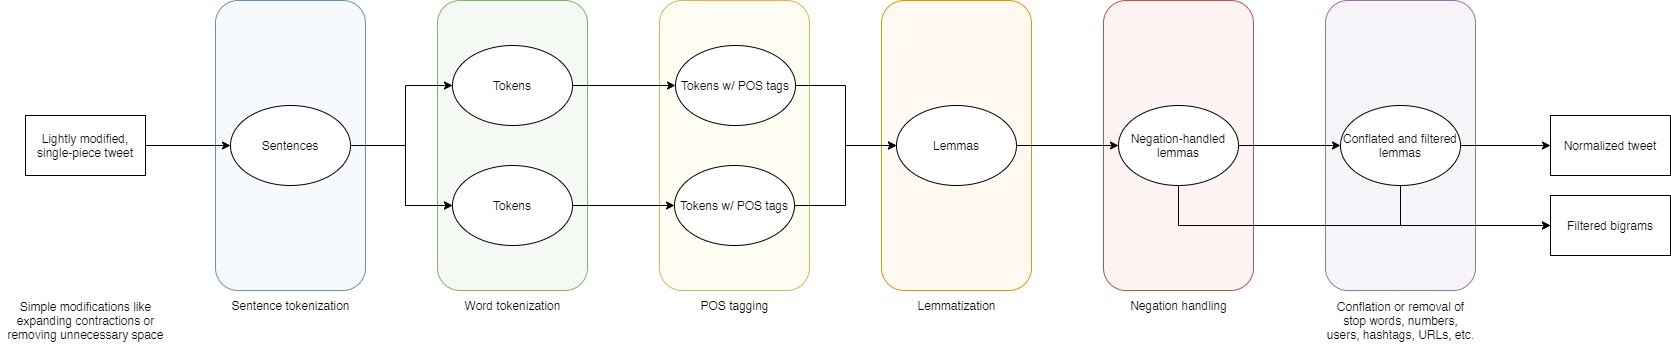

### Discussion Question

* Which parts of the tweets removed could be useful? Come up with some arguments for keeping them.

* Think of why looking into pairs of words could be important as opposed to individual words?

> Answers can be written here by double clicking and editing the text.

## Sentiment analysis<a id="sentiment"></a>

We can automatically detect the sentiment of words (and therefore sentences) without the need of manually reading labeling all the data. This can be especially useful for contents that target specific products or people, but we can apply this to our dataset as well.

Sentiment analysis can be done using rules or data driven models. In this lab session, we will simply use NLTK's sentiment analyzer that uses [VADER tool and lexicon](https://www.semanticscholar.org/paper/VADER%3A-A-Parsimonious-Rule-Based-Model-for-Analysis-Hutto-Gilbert/bcdc102c04fb0e7d4652e8bcc7edd2983bb9576d).

Lexicons are collections of words designed for specific purposes and making sense of textual data in general. They can be about sentiments, emotions, or other purpose-specific words (plants, animals, etc.). We could collect positive words (such as "nice" and "wonderful") in a file, and check if a sentence has words from that file, indicating whether they are associated with positive sentiments. This would be our positive words lexicon.

Alternatively, we could collect words that have a sentiment value (valence), and assign sentiment scores for them. So, we could assign "great" to "1" (positive) and "terrible" to "-1" (negative). VADER actually works like this. It is a word list that is manually rated by different individuals to obtain mean sentiment scores for each word. Naturally, there are other things to consider as well. For example, apart from negation, the existence of certain words also modify the sentiment's intensity ("bad" becomes even more negative with the word "very"). VADER handles these (and more) for us, so we can simply tokenize sentences and feed them to the analyzer to retrieve the normalized (between -1 and 1) sentence-level sentiment scores:

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

sentiment_analyzer = SentimentIntensityAnalyzer()
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Notice how sentiment scores differ for the following sentences:
sentences = ["It looks VERY BAD!!!",
             "It looks VERY BAD.",
             "It looks very bad.",
             "It looks bad.",
             "It does not look very bad.",
             "It does not look bad.",
             "It looks good.",
             "It looks good!",
             "It looks VERY BAD!!! It looks good!"]

for sentence in sentences:
    # It retrieves separate scores for negativity, neutrality, and positivity, but we
    # can generally simply use the compound score as well.
    print(sentence,sentiment_analyzer.polarity_scores(sentence))

It looks VERY BAD!!! {'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.7984}
It looks VERY BAD. {'neg': 0.637, 'neu': 0.363, 'pos': 0.0, 'compound': -0.7398}
It looks very bad. {'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5849}
It looks bad. {'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}
It does not look very bad. {'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.4708}
It does not look bad. {'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.431}
It looks good. {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
It looks good! {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4926}
It looks VERY BAD!!! It looks good! {'neg': 0.449, 'neu': 0.349, 'pos': 0.202, 'compound': -0.6733}


It is decent especially considering its ease of use. Note that the last example does not work so well, because we did not separate those two sentences.

We can write a function that separates the sentences, computes their sentiment scores, and averages those scores:

In [ ]:
# This function optionally takes tokenizer and analyzer objects. This is not needed,
# but it can help with portability.

def analyze_sentiment(tweet, sentence_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle'),
                      sentiment_analyzer=SentimentIntensityAnalyzer()):

    # Sentences are tokenized:
    sentences = sentence_tokenizer.tokenize(tweet)

    # Remember that tweets have hashtags, URLs, etc. that may confuse sentiment
    # analysis process and pull the sentiment towards the middle. A sentiment score
    # is not retrieved if the sentence has no sentiment and it has less than four
    # tokens (including punctuation). So that a URL would not affect the sentiment
    # while genuinely neutral sentences, given that they are long enough, would not
    # be disregarded. Some of the processes we have used (such as URL removal) could
    # be applied here as well. Feel free to play with its logic.
    sentiments = [sentiment_analyzer.polarity_scores(sentence)["compound"] for sentence in sentences
                  if sentiment_analyzer.polarity_scores(sentence)["compound"] != 0 or len(tokenizer.tokenize(sentence)) > 3]

    # Returns the average compound sentiment score if a sentiment is detected.
    if sentiments:
        return sum(sentiments)/len(sentiments)
    # Returns 0 if a sentiment is not detected:
    else:
        return 0

# One sentence is negative and the other is positive while the general tone is closer
# to being negative:
analyze_sentiment("It looks VERY BAD!!! It looks good!", sentence_tokenizer, sentiment_analyzer)

-0.1529

This is much better. We can now apply this function the dataset and obtain the average sentiment score of each tweet:

In [ ]:
dataset["sentiment"] = dataset["text"].map(analyze_sentiment)

dataset[["text", "sentiment"]].head(25)

,text,sentiment
8050,$TNXP $HTBX $IBIO $SRNE $MRNA $VXRT $VBIV #tonix #tonx #pennystocks #covid19 #vaccines #news https://t.co/kk14umHkVr,0.00000
17871,Touching up my new ideas! #thirdbook #Covid19 https://t.co/eqt4V0QaHm,0.00000
11394,Jim Jordan is a typical old white male republican d1ckweed. #Fauci #JimJordan #COVID19 #coronavirus,0.00000
18143,Is COVID bullshit ?#COVID19,-0.58590
16069,Hey guys DM for this beautiful dior 👜👜 Whatsapp _+2347083131413 #BigBrotherNaijaLockdown2020 #Erica #COVID19 https://t.co/qUIbFCNV9Z,0.68330
30500,Boyz holiday 🐒 17 Aug 2020 #VoetsekCyril #VoetsekRamaphosa #COVID19 #RememberMarikana #AlcoholBan #CigaretteBan https://t.co/8RMy48M3KE,0.40190
37352,The #COVID19 pandemic has shined a light in the critical need for supportive spaces for #LGBTQ+ students. https://t.co/5whGBSS3Cb,-0.02580
19322,BJP’s #Bargarh MP Suresh Pujari tests positive for #COVID19 https://t.co/dBwbJggYvA,0.55740
34233,220 coronavirus cases now linked to Aberdeen cluster https://t.co/e2dFsxotSF #coronavirus #covid19,0.00000
39453,@jdubu2 #COVID19 - they blew it. https://t.co/yWx8rFI2sg,0.00000


It is not perfect as you can see, but it is much more reliable at the extremes:

In [ ]:
dataset[["text", "sentiment"]].sort_values('sentiment', ascending=False).head(5)

,text,sentiment
894,Stay SAFE and HEALTHY Wear a MASK save LIVES priceless #COVID19 https://t.co/XP6RBXtsxl,0.8825
12688,Please we need this win!! #FACup #COVID19,0.8118
9619,"@CityCynthia I am not even ready for patios, but appreciate those who are, safely. #COVID19",0.8071
37603,"GOOD NEWS: OU reports of the 4,516 students who received their results 62 tested positive for #COVID19 https://t.co/EwjvHxKfFH",0.8038
1702,German made FFP2 N95 CE approved masks made from German meltblown - let us win covid #COVID19 #MedicareForAll,0.7650


In [ ]:
dataset[["text", "sentiment"]].sort_values('sentiment').head(5)

,text,sentiment
36197,#Hollywood can make anyone look sick and who not better to act sick while they look sick! #Covid19 #WhereAllTheseActorsEntertainersGo?,-0.9118
8711,I guess the @DNC can afford to lose the 2020 election as the #COVID19 death toll rises and millions face eviction. #MedicareForAll,-0.8625
4594,It would be terribly wrong of me to wish all these defiant 'my right' people refusing to wear masks get #COVID19...,-0.8225
8966,UAE expat who lost son in tragic accident pays towards repatriation of 61 Indians #Covid19 https://t.co/y3LMNSn2lO,-0.8126
8072,"The death rates in NY, NJ, and IL are horrible. #COVID19 https://t.co/n5kLlH4ECT",-0.8126


We can now use these sentiment scores with other analyses. You are encouraged to explore these tweets and other methods for analysis.

Note that there are some important limitations. A word can have different meanings in different domains/contexts. Consider these sentences:

* This song is **sick**. → Nice.👍
* This child is **sick**. → Not nice.👎

Sometimes, a word can have one meaning yet different implications. Consider these sentences:

* The patient had a **positive** experience. → Nice.👍
* The patient had a **positive** test result for COVID-19. → Not nice.👎

You might want to make adjustments or use your own lexicon for a specific topic/task. You can also train a model to guess the sentiment. [Check](https://towardsdatascience.com/basic-binary-sentiment-analysis-using-nltk-c94ba17ae386) this example.

If you are interested in lexicon-based approaches, take a look at [EmoLex](https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm), a lexicon for emotions and sentiment. It can be used to automatize emotion detection. It also has Turkish words (along with some other languages), but they are an automatic translation, so they are not as reliable. You can now directly download it from its web page.

### Discussion Question

* Imagine extending the above exercise to the entire dataset. (Or try it yourself.) <br> What can be changed to accelerate this? Look through the [Levenshtein](https://rapidfuzz.github.io/Levenshtein/levenshtein.html) documentation for clues.

> Answers can be written here by double clicking and editing the text.

## More information<a id="more-info"></a>

* [NLTK documentation](https://www.nltk.org/)
* [TextBlob](https://textblob.readthedocs.io/en/dev/): A library written on NLTK. You may want to look at this as well since certain tasks can be easier with TextBlob.
* [spaCy](https://github.com/explosion/spaCy): Another popular NLP library.
* [Stanza](https://stanfordnlp.github.io/stanza/): An NLP library with a language-agnostic pipeline that makes use of neural networks. It also provides an interface for [CoreNLP](https://stanfordnlp.github.io/CoreNLP/), a popular NLP library for Java. It supports Turkish. You can check how it works with Turkish (or any other language) from [here](http://stanza.run/).
* If you are interested in linguistics, you can take a look at [the course catalog of Cognitive Science Department at METU](https://catalog.metu.edu.tr/prog_courses.php?prog=902) as they have some specialized courses.
* [Social media text normalization for Turkish](https://www.cambridge.org/core/journals/natural-language-engineering/article/social-media-text-normalization-for-turkish/6BADFEB835E28ABC03CDC472B2BAA6AB)

If you have questions, feel free to send an e-mail.